# Отчет по предмету "Численные методы решения дифференциальных уравнений" 5

Выполнил **Свистельников Илья**

---
**Задание**

Используя явную и неявную конечно-разностные схемы, а также схему Кранка -
Николсона, решить начально-краевую задачу для дифференциального уравнения
параболического типа. Осуществить реализацию трех вариантов аппроксимации
граничных условий, содержащих производные: двухточечная аппроксимация с
первым порядком, трехточечная аппроксимация со вторым порядком, двухточечная
аппроксимация со вторым порядком. В различные моменты времени вычислить
погрешность численного решения путем сравнения результатов с приведенным в
задании аналитическим решением Ux t ( , ). Исследовать зависимость погрешности от
сеточных параметров τ,h.

---


$\frac{∂u}{∂t} = a\frac{∂^2u}{∂x^2}, a>0$

$u(0,t) = 0,$

$u(1,t) = 1,$

$u(x,0) = sin\ 2\pi x,$

Аналитическое решение: $U(x,t) = e^{-4 \pi^2 at}\ sin\ 2\pi x$


Для решения заданной задачи для гиперболического дифференциального уравнения воспользуемся явной схемой "крест" и неявной схемой. Кроме того, выполним аппроксимацию второго начального условия с первым и со вторым порядком точности. Также реализуем три варианта аппроксимации граничных условий, содержащих производные.

**Заданное уравнение и условия:**

$$\frac{∂u}{∂t} = a\frac{∂^2u}{∂x^2}$$


**Явная схема:**

$$\frac{U_i^{n+1} - U_i^n}{\tau} = a\frac{U_{i+1}^{n} - 2U_i^{n} + U_{i-1}^{n}}{h^2}\Rightarrow$$
$$\Rightarrow U_{i}^{n+1} =rU_{i-1}^{n}+(1-2r)U_{i}^{n}+rU_{i+1}^{n}$$

**Неявная схема:**

$$\frac{U_i^{n+1} - U_i^n}{\tau} = a\frac{U_{i+1}^{n+1} - 2U_i^{n+1} + U_{i-1}^{n+1}}{h^2} \Rightarrow$$
$$\Rightarrow -rU_{i+1}^{n+1} + (1 + 2r)U_{i}^{n+1} - rU_{i-1}^{n+1} = U_{i}^{n}$$

### Конечно-разностные схемы

$r = \frac{a\tau}{h^2}$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular

plt.style.use("ggplot");

Зададим начальные и граничные условия

In [ ]:
def initial_condition(x):
    return np.sin(2 * np.pi * x)

In [ ]:
def boundary_condition(u, t):
    u[0] = 0
    u[-1] = 0
    return u

In [ ]:
def boundary_conditions(u, h, approximation=None):
    if approximation == "two_point_first_order":
        u = two_point_first_order(u, h)
    elif approximation == "three_point_second_order":
        u = three_point_second_order(u, h)
    elif approximation == "two_point_second_order":
        u = two_point_second_order(u, h)
    else:
        u = boundary_condition(u, h)
    return u

Двухточечная аппроксимация с первым порядком

In [ ]:
def two_point_first_order(u, h):
    u[0] = (u[1] - u[0]) / h
    u[-1] = (u[-1] - u[-2]) / h
    return u

Трехточечная аппроксимация со вторым порядком

In [ ]:
def three_point_second_order(u, h):
    u[0] = (4 * u[1] - u[2]) / (2 * h)
    u[-1] = (4 * u[-2] - u[-3]) / (2 * h)
    return u

Двухточечная аппроксимация со вторым порядком

In [ ]:
def two_point_second_order(u, h):
    u[0] = (u[1] - u[0]) / h
    u[-1] = (u[-1] - u[-2]) / h
    return u

Аналитическое решение

In [ ]:
def analytical_solution(x, t):
    return np.exp(-4 * np.pi**2 * a * t) * np.sin(2 * np.pi * x)

Явная, неявная и схема Кранка-Николсона (соотвествуют 1, 2 и 3 формулам из учебника)

In [ ]:
def explicit_scheme(tau, approximation=None):
    alpha = a**2 * tau / h**2  # alpha = a^2 * τ / h^2
    u = np.array([initial_condition(xi) for xi in x])
    for n in range(Nt):
        u_new = np.copy(u)
        u_new = boundary_conditions(u_new, n * tau, approximation)
        for j in range(1, Nx - 1):
            u_new[j] = u[j] + alpha * (u[j+1] - 2*u[j] + u[j-1])
    return u

In [ ]:
def implicit_scheme(tau):
    alpha = a**2 * tau / h**2  # alpha = a^2 * τ / h^2
    u = np.array([initial_condition(xi) for xi in x])
    A = np.zeros((Nx, Nx))
    b = np.zeros(Nx)
    for j in range(1, Nx - 1):
        A[j, j-1] = -alpha
        A[j, j] = 1 + 2*alpha
        A[j, j+1] = -alpha
    A[0, 0] = A[-1, -1] = 1  # Граничные условия
    for n in range(Nt):
        b[1:-1] = u[1:-1]
        b = boundary_conditions(b, n * tau)
        u = solve_triangular(A, b)
    return u

In [ ]:
def crank_nicolson_scheme(tau, theta=0.5):
    alpha = a**2 * tau / h**2  # alpha = a^2 * τ / h^2
    u = np.array([initial_condition(xi) for xi in x])
    A = np.zeros((Nx, Nx))
    B = np.zeros((Nx, Nx))
    for j in range(1, Nx - 1):
        A[j, j-1] = -theta * alpha
        A[j, j] = 1 + 2 * theta * alpha
        A[j, j+1] = -theta * alpha
        B[j, j-1] = (1 - theta) * alpha
        B[j, j] = 1 - 2 * (1 - theta) * alpha
        B[j, j+1] = (1 - theta) * alpha
    A[0, 0] = A[-1, -1] = 1  # Граничные условия
    B[0, 0] = B[-1, -1] = 1  # Граничные условия
    for n in range(Nt):
        b = np.dot(B, u)
        b = boundary_conditions(b, n * tau)
        u = solve_triangular(A, b)
    return u

Решение

In [ ]:
T = [0.1, 0.5, 1.0] # tau

a = 0.12  # коэффициент диффузии
L = 1.0  # длина области
Nx = 50  # количество точек по x
Nt = 100  # количество шагов по времени
h = L / (Nx - 1)  # шаг по пространству
x = np.linspace(0, L, Nx)

tau1 = T[0] / Nt  # шаг по времени
tau2 = T[1] / Nt  # шаг по времени
tau3 = T[2] / Nt  # шаг по времени

Явная схема

In [ ]:
u_explicit1 = explicit_scheme(tau1)
u_explicit2 = explicit_scheme(tau2)
u_explicit3 = explicit_scheme(tau3)


Неявная схема

In [ ]:
u_implicit1 = implicit_scheme(tau1)
u_implicit2 = implicit_scheme(tau2)
u_implicit3 = implicit_scheme(tau3)


Схема Кранка-Николсона

In [ ]:
u_cn1 = crank_nicolson_scheme(tau1)
u_cn2 = crank_nicolson_scheme(tau2)
u_cn3 = crank_nicolson_scheme(tau3)


# Построение графиков

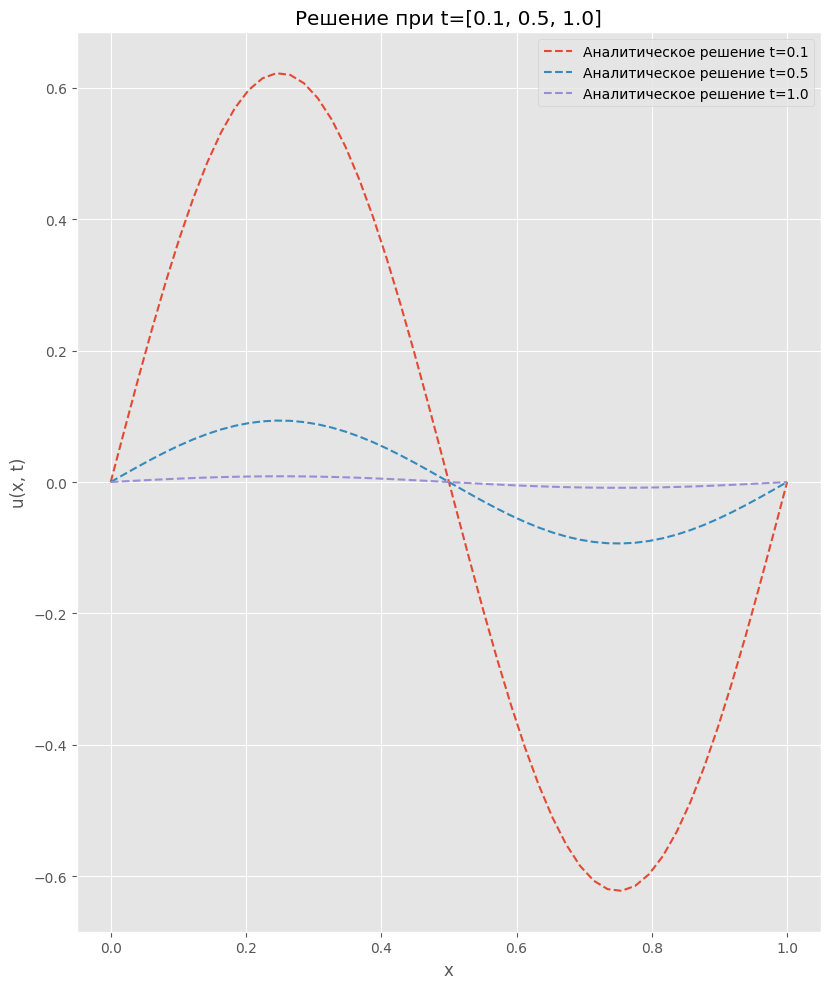

In [ ]:
plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
plt.plot(x, analytical_solution(x, T[0]), label=f'Аналитическое решение t={T[0]}', linestyle='dashed')
plt.plot(x, analytical_solution(x, T[1]), label=f'Аналитическое решение t={T[1]}', linestyle='dashed')
plt.plot(x, analytical_solution(x, T[2]), label=f'Аналитическое решение t={T[2]}', linestyle='dashed')

#plt.plot(x, u_explicit1, label=f'Явная схема t={T[0]} ')
#plt.plot(x, u_explicit2, label=f'Явная схема t={T[1]} ')
#plt.plot(x, u_explicit3, label=f'Явная схема t={T[2]} ')

#plt.plot(x, u_implicit1, label=f'Неявная схема t={T[0]} ')
#plt.plot(x, u_implicit2, label=f'Неявная схема t={T[1]} ')
#plt.plot(x, u_implicit3, label=f'Неявная схема t={T[2]} ')

#plt.plot(x, u_cn1, label=f'Схема Кранка-Николсона t={T[0]} ')
#plt.plot(x, u_cn2, label=f'Схема Кранка-Николсона t={T[1]} ')
#plt.plot(x, u_cn3, label=f'Схема Кранка-Николсона t={T[2]} ')

plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title(f'Решение при t={T}')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# График 3д


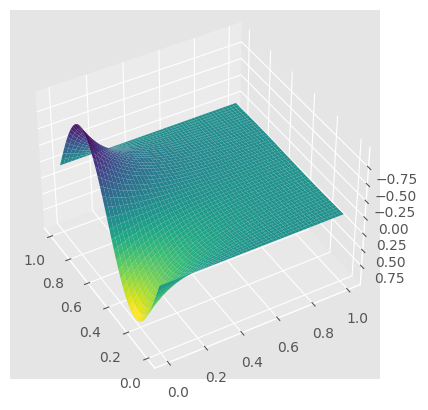

In [ ]:
xx = np.linspace(0, L, Nx)
tt = np.linspace(0, L, Nx)
xx, tt = np.meshgrid(xx, tt)
z = analytical_solution(xx, tt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, tt, z, cmap='viridis')

ax.view_init(-140, 30)